Epoch 1/5
750/750 [==============================] - 217s 286ms/step - loss: 0.1318 - accuracy: 0.9588 - val_loss: 0.0539 - val_accuracy: 0.9843
Epoch 2/5
750/750 [==============================] - 192s 256ms/step - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.0356 - val_accuracy: 0.9902
Epoch 3/5
750/750 [==============================] - 159s 212ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0301 - val_accuracy: 0.9911
Epoch 4/5
750/750 [==============================] - 163s 218ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 5/5
750/750 [==============================] - 149s 198ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0386 - val_accuracy: 0.9902


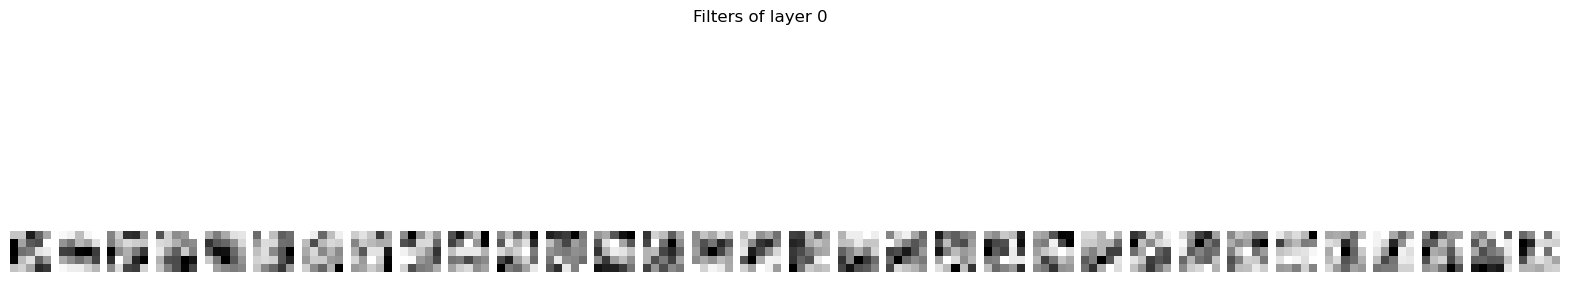

1/1 [==============================] - 0s 200ms/step


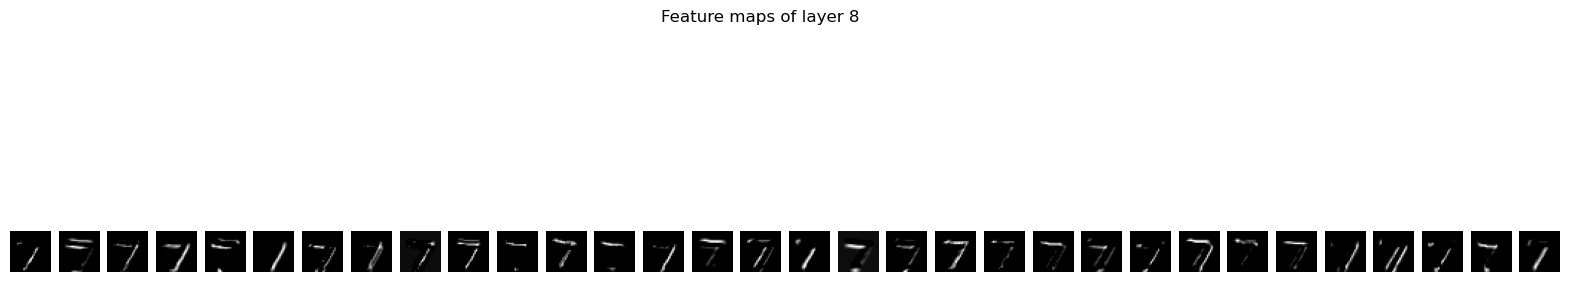

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import mnist

from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential()

model.add(Conv2D(32, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64, kernel_size=5, strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="sigmoid"))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Extracting filters
def plot_filters(layer, layer_index):

    filters, biases = layer.get_weights()
    n_filters = filters.shape[-1]

    fig, axs = plt.subplots(1, n_filters, figsize=(20, 5))
    for i in range(n_filters):
        f = filters[:, :, 0, i]
        axs[i].imshow(f, cmap="gray")
        axs[i].axis('off')
    plt.suptitle(f'Filters of layer {layer_index}')
    plt.show()

# Visualize filters from the first convolutional Layer
plot_filters(model.layers[0], 0)

# Function to visualize feature maps
def plot_feature_maps(image, layer, layer_index):

    feature_extractor = Model(inputs=model.inputs, outputs=layer.output)
    feature_maps = feature_extractor.predict(image[np.newaxis, ...])

    n_feature_maps = feature_maps.shape[-1]
    fig, axs = plt.subplots(1, n_feature_maps, figsize=(20, 5))

    for i in range(n_feature_maps):
        f = feature_maps[0, :, :, i]
        axs[i].axis('off')
        axs[i].imshow(f, cmap='gray')
    plt.suptitle(f'Feature maps of layer {layer_index}')
    plt.show()
plot_feature_maps (x_test[0], model.layers[0], 8)